<a href="https://colab.research.google.com/github/rishabhk0/Rishabh_ML_AI/blob/main/Deep_cv_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info>=(3,7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__)>=version.parse("1.0.1")

In [ ]:
import tensorflow as tf
assert version.parse(tf.__version__)>=version.parse("2.8.0")

Defining the default font sizes to make figures prettier

In [ ]:
from types import LambdaType
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


Implementing Convolutional layers with keras

In [ ]:
from sklearn.datasets import load_sample_images

images=load_sample_images()["images"]
images= tf.keras.layers.CenterCrop(height=70, width=120)(images)
images= tf.keras.layers.Rescaling(scale=1/255)(images)

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer= tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps=conv_layer(images)

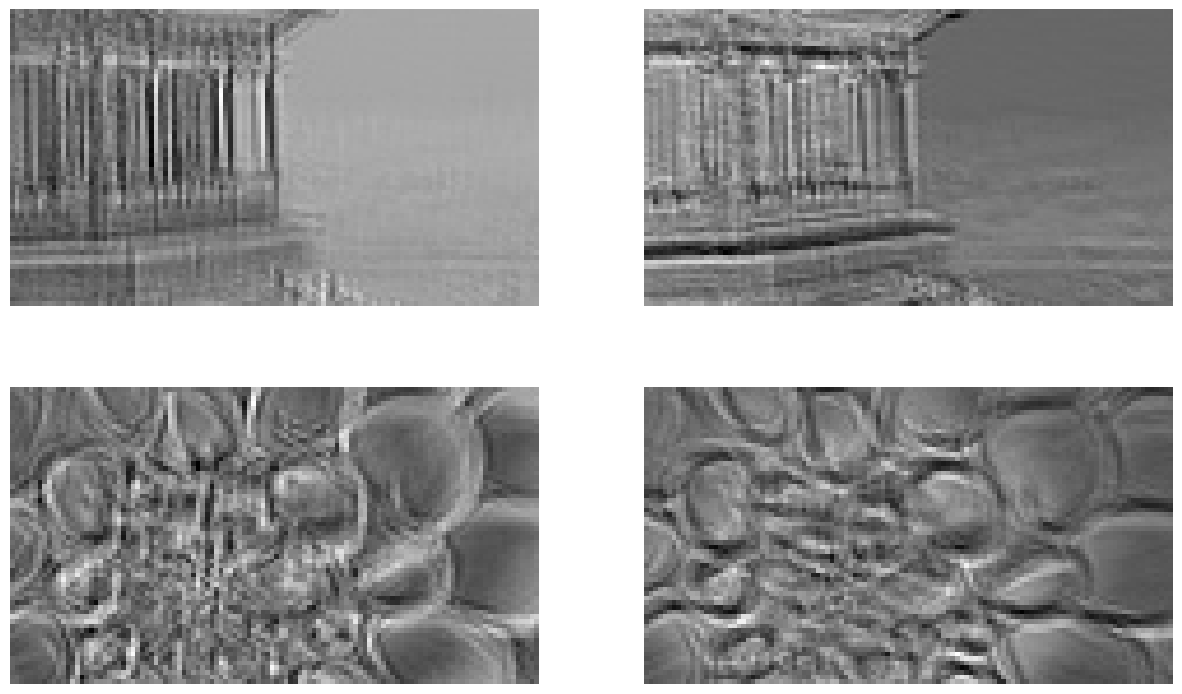

In [ ]:
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", strides =2)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
biases.shape

(32,)

Pooling layers-implementing pooling layers with keras

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool(images)

In [ ]:
class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size

    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

Global average pool

In [ ]:
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
global_avg_pool= tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=[1, 2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

CNN architechtures- implementing pretrained CNN models using keras

In [ ]:
model = tf.keras.applications.ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
k = tf.keras.backend
images= k.constant(load_sample_images()["images"])
images_resized = tf.keras.layers.Resizing(height=224, width=224,crop_to_aspect_ratio=True)(images)

In [ ]:
inputs= tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
y_prob = model.predict(inputs)
y_prob.shape

ValueError: Input 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(2, 224, 244, 3)